# Phase Classification
## Convolutional network

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import *
from tensorflow.keras.layers import *

In [2]:
def evaluate_model(build_model, x_train, y_train, x_test, y_test):
    epoch_convergence = []
    train_loss = []
    train_accuracy = []
    test_loss = []
    test_accuracy = []

    model_history_of_last_run = []

    # build and train model
    for i in range(5):
        model = build_model()

        model_history = model.fit(x_train, y_train,
                                  batch_size=128,
                                  epochs=20,
                                  verbose=0,
                                  validation_data=(x_test, y_test))

        # Report model summary once
        if i == 0:
            model.summary()

        epoch_number_after_train_accuracy_convergence = find_stable_epoch(model_history, 'accuracy')
        epoch_number_after_test_accuracy_convergence = find_stable_epoch(model_history, 'val_accuracy')

        epoch_number_after_model_convergence = max(epoch_number_after_train_accuracy_convergence,
                                                   epoch_number_after_test_accuracy_convergence)

        # evaluate model
        score = model.evaluate(x_test, y_test, verbose=0)

        # Append data
        epoch_convergence.append(epoch_number_after_model_convergence)
        train_loss.append(model_history.history['loss'][-1])
        train_accuracy.append(model_history.history['accuracy'][-1])
        test_loss.append(score[0])
        test_accuracy.append(score[1])

        # Save a sample of the training history
        if i == 4:
            model_history_of_last_run = model_history

    average_epoch_after_convergence = np.average(epoch_convergence)
    average_loss_train = np.average(train_loss)
    average_accuracy_train = np.average(train_accuracy)
    average_loss_test = np.average(test_loss)
    average_accuracy_test = np.average(test_accuracy)

    return ({'Average epoch after convergence': average_epoch_after_convergence,
             'Average training loss': average_loss_train,
             'Average training accuracy': average_accuracy_train,
             'Average test loss': average_loss_test,
             'Average test accuracy': average_accuracy_test}, model_history_of_last_run)


def find_stable_epoch(model_history, identifier):
    identical_accuracy_count = 0
    last_accuracy_value = 0
    stable_epoch_number = 0
    for index, accuracy in enumerate(model_history.history[identifier]):
        if last_accuracy_value == accuracy:
            identical_accuracy_count += 1
        if identical_accuracy_count == 4:
            stable_epoch_number = index + 1
            break
        last_accuracy_value = accuracy

    if stable_epoch_number == 0:
        stable_epoch_number = -1

    return stable_epoch_number


def visualize_training(model_history, model_name):
    # visualize history for accuracy
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Accuracy of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()
    # visualize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.title('Loss of {model_name} w.r.t. training epochs'.format(model_name=model_name))
    plt.show()


def report_and_visualize_model_performance(build_model, x_train, y_train, x_test, y_test, model_name):
    performance_report, model_history_sample = evaluate_model(build_model, x_train, y_train, x_test, y_test)
    visualize_training(model_history_sample, model_name)
    print(json.dumps(performance_report, indent=2))

In [3]:
x_train = np.load("x_train.npy")
x_test = np.load("x_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [4]:
x_train_reshaped = x_train[:,:,:, np.newaxis]
x_test_reshaped = x_test[:,:,:, np.newaxis]
input_shape = (40,40,1)

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 10)        7850      
_________________________________________________________________
activation (Activation)      (None, 13, 13, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1691      
Total params: 9,541
Trainable params: 9,541
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 11.2,
  "Average training loss": 0.004558334201283288,
  "Average training accuracy": 1.0,
  "Average test loss": 0.00466306560774683,
  "Average test accuracy": 0.9998346567153931
}


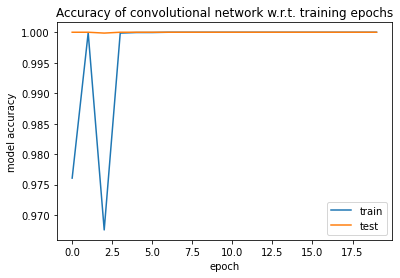

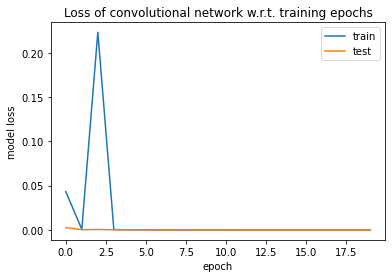

In [5]:
# First attempt with a single convolutional layer
def build_conv_model_1():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(10, (28,28), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_1, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 10)        2260      
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6761      
Total params: 9,021
Trainable params: 9,021
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.4,
  "Average training loss": 6.7837655024050035e-06,
  "Average training accuracy": 1.0,
  "Average test loss": 4.973798922947026e-06,
  "Average test accuracy": 1.0
}


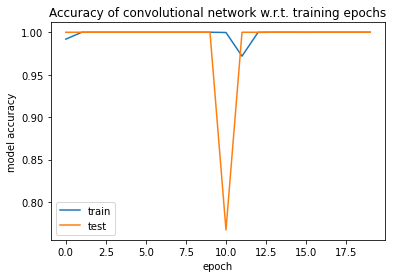

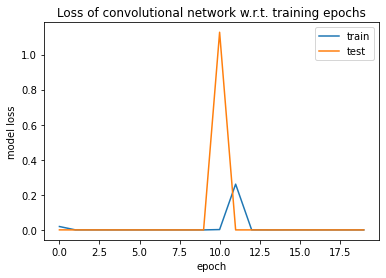

In [6]:
# Second attempt with a smaller kernel
def build_conv_model_2():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(10, (15,15), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_2, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')


Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 38, 38, 10)        100       
_________________________________________________________________
activation_10 (Activation)   (None, 38, 38, 10)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 14440)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 14441     
Total params: 14,541
Trainable params: 14,541
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.0,
  "Average training loss": 8.709309622645377e-06,
  "Average training accuracy": 1.0,
  "Average test loss": 1.1433302279328928e-05,
  "Average test accuracy": 1.0
}


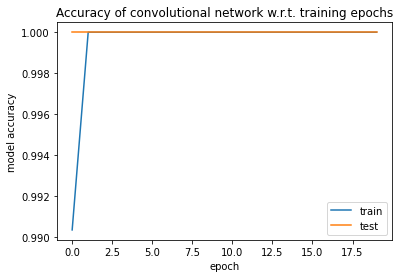

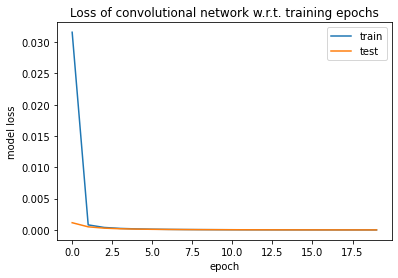

In [7]:
# Third attempt with even smaller kernel
def build_conv_model_3():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(10, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_3, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 39, 39, 10)        50        
_________________________________________________________________
activation_15 (Activation)   (None, 39, 39, 10)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 15210)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 15211     
Total params: 15,261
Trainable params: 15,261
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.0,
  "Average training loss": 1.7951768313650973e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 2.5850329257082195e-05,
  "Average test accuracy": 1.0
}


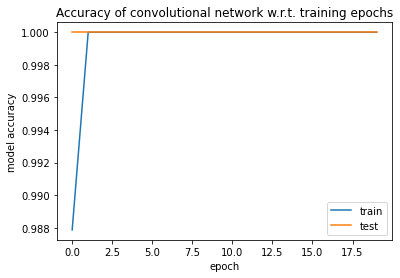

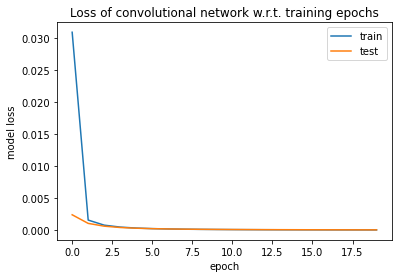

In [8]:
# Fourth attempt with tiny kernel
def build_conv_model_4():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(10, (2,2), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_4, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 39, 39, 5)         25        
_________________________________________________________________
activation_20 (Activation)   (None, 39, 39, 5)         0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 7605)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 7606      
Total params: 7,631
Trainable params: 7,631
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.6,
  "Average training loss": 2.6121218252228572e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 3.896233174600638e-05,
  "Average test accuracy": 1.0
}


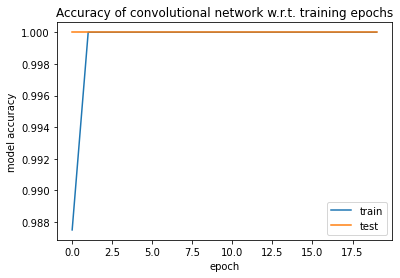

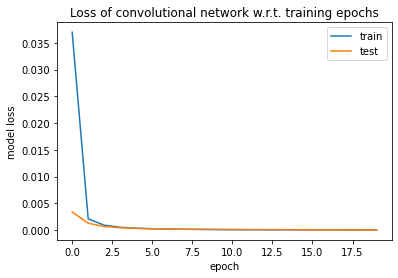

In [9]:
# Fifth attempt with less feature maps

def build_conv_model_5():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(5, (2,2), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_5, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')



Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 38, 38, 5)         50        
_________________________________________________________________
activation_25 (Activation)   (None, 38, 38, 5)         0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 7220)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7221      
Total params: 7,271
Trainable params: 7,271
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 6.0,
  "Average training loss": 1.808779106795555e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 2.260845467390027e-05,
  "Average test accuracy": 1.0
}


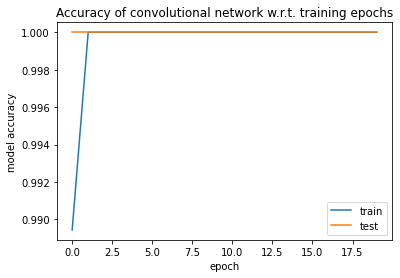

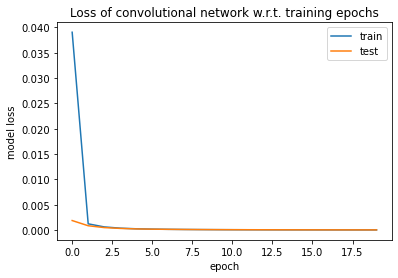

In [10]:
# Sixth attempt with less feature maps but slightly bigger kernel

def build_conv_model_6():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(5, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_6, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 38, 38, 3)         30        
_________________________________________________________________
activation_30 (Activation)   (None, 38, 38, 3)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 4332)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 4333      
Total params: 4,363
Trainable params: 4,363
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 9.8,
  "Average training loss": 3.4134467568947e-05,
  "Average training accuracy": 1.0,
  "Average test loss": 6.890414515510201e-05,
  "Average test accuracy": 1.0
}


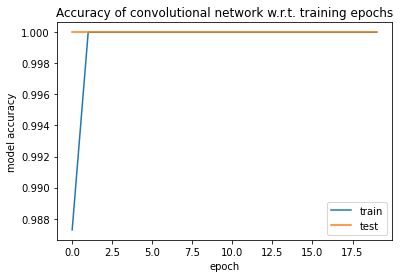

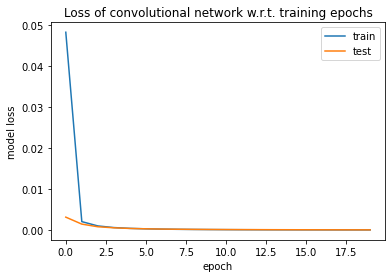

In [11]:
# Seventh attempt with even less feature maps
def build_conv_model_7():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(3, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_7, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 38, 38, 5)         50        
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 36, 36, 5)         230       
_________________________________________________________________
activation_35 (Activation)   (None, 36, 36, 5)         0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 6480)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 6481      
Total params: 6,761
Trainable params: 6,761
Non-trainable params: 0
_________________________________________________________________
{
  "Average epoch after convergence": 7.2,
  "Average training loss": 0.00797293540931605,
  "Average trainin

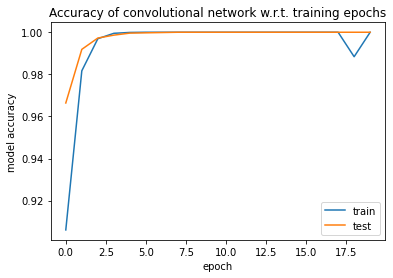

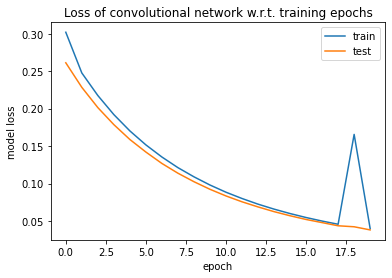

In [12]:
# Eighth attempt with second convolutional layer
def build_conv_model_8():
    model = Sequential(name='ConvolutionalNetwork')
    model.add(Conv2D(5, (3,3), input_shape=input_shape))
    model.add(Conv2D(5, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    return model

report_and_visualize_model_performance(build_conv_model_8, x_train_reshaped, y_train, x_test_reshaped, y_test, 'convolutional network')

## Save best performing model

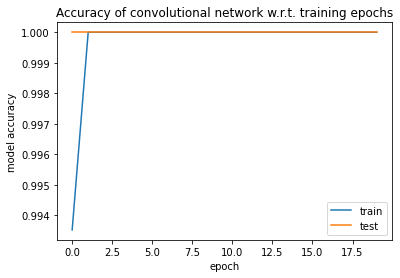

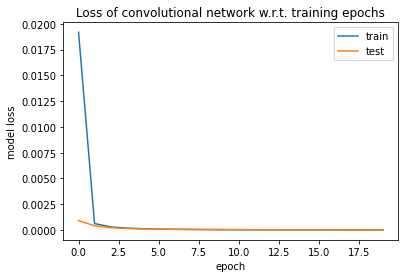

In [13]:
conv_model = build_conv_model_6()
history  = conv_model.fit(x_train_reshaped, y_train, batch_size=128, epochs=20, verbose=0, validation_data=(x_test_reshaped, y_test))
visualize_training(history, 'convolutional network')
conv_model.save("conv_model.h5")
conv_model.save_weights("final_weights_conv_model.h5")